# STUDY CASE

Untuk Belajar

## About Data

Menganalisis data selama rentang 1 Tahun dimulai dari tanggal 8 Maret 2022 hingga 8 maret 2023. Data yang di analisis merupakan data saham yang terdaftar di National Stock Exchange (NSE)
https://www.nseindia.com/national-stock-exchange/about-nse-company

- ADANIENT Ltd. (Perusahaan bidang Metal dan mineral)



## Data 

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

import data dari drive ke colab

In [39]:
ADN_DF = pd.read_csv('/content/drive/MyDrive/Belajar Data Analisis/ADANIENT-EQ.csv')
ADN_DF.head(5)

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,08-Mar-2023,EQ,"2,040.00","2,088.00","1,941.00","1,982.90","2,039.00","2,039.65","2,029.34","4,190.00","1,017.45",13568243,"27,534,592,803.85",625491
1,06-Mar-2023,EQ,"1,966.70","2,135.00","1,855.00","1,879.50","1,982.00","1,982.90","2,021.04","4,190.00","1,017.45",27180456,"54,932,839,562.45",1230939
2,03-Mar-2023,EQ,"1,688.85","1,905.95","1,685.50","1,607.25","1,874.00","1,879.50","1,806.68","4,190.00","1,017.45",22888891,"41,352,917,851.60",822488
3,02-Mar-2023,EQ,"1,499.90","1,646.00","1,407.90","1,564.30","1,588.00","1,607.25","1,564.51","4,190.00","1,017.45",26970925,"42,196,200,068.15",924791
4,01-Mar-2023,EQ,"1,424.00","1,580.00","1,411.00","1,363.85","1,579.00","1,564.30","1,511.37","4,190.00","1,017.45",20114340,"30,400,282,052.45",758963


## CLEANING DATA

Cek jumlah data

In [40]:
ADN_DF.shape

(250, 14)

In [41]:
ADN_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           250 non-null    object
 1   series         250 non-null    object
 2   OPEN           250 non-null    object
 3   HIGH           250 non-null    object
 4   LOW            250 non-null    object
 5   PREV. CLOSE    250 non-null    object
 6   ltp            250 non-null    object
 7   close          250 non-null    object
 8   vwap           250 non-null    object
 9   52W H          250 non-null    object
 10  52W L          250 non-null    object
 11  VOLUME         250 non-null    int64 
 12  VALUE          250 non-null    object
 13  No of trades   250 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 27.5+ KB


In [42]:
list(ADN_DF.columns)

['Date ',
 'series ',
 'OPEN ',
 'HIGH ',
 'LOW ',
 'PREV. CLOSE ',
 'ltp ',
 'close ',
 'vwap ',
 '52W H ',
 '52W L ',
 'VOLUME ',
 'VALUE ',
 'No of trades ']

In [43]:
ADN_DF.keys()

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [44]:
col = list()
for key in ADN_DF.keys():
  for rep in ('.'):
      key = (key.replace(rep,''))
  key = key.strip().replace(' ','_')
  col.append(key)

ADN_DF.columns = col
ADN_DF.keys()

Index(['Date', 'series', 'OPEN', 'HIGH', 'LOW', 'PREV_CLOSE', 'ltp', 'close',
       'vwap', '52W_H', '52W_L', 'VOLUME', 'VALUE', 'No_of_trades'],
      dtype='object')

In [45]:
cols_to_convert = ['OPEN', 'HIGH', 'LOW', 'PREV_CLOSE', 'ltp', 'close', '52W_H', '52W_L', 'VOLUME', 'VALUE']

for col in cols_to_convert:
    ADN_DF[col] = ADN_DF[col].replace(',','', regex=True).astype(float)
ADN_DF['Date'] = pd.to_datetime(ADN_DF['Date'])

ADN_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          250 non-null    datetime64[ns]
 1   series        250 non-null    object        
 2   OPEN          250 non-null    float64       
 3   HIGH          250 non-null    float64       
 4   LOW           250 non-null    float64       
 5   PREV_CLOSE    250 non-null    float64       
 6   ltp           250 non-null    float64       
 7   close         250 non-null    float64       
 8   vwap          250 non-null    object        
 9   52W_H         250 non-null    float64       
 10  52W_L         250 non-null    float64       
 11  VOLUME        250 non-null    float64       
 12  VALUE         250 non-null    float64       
 13  No_of_trades  250 non-null    int64         
dtypes: datetime64[ns](1), float64(10), int64(1), object(2)
memory usage: 27.5+ KB


In [ ]:
ADN_DF.isnull().sum()

Date            0
series          0
OPEN            0
HIGH            0
LOW             0
PREV_CLOSE      0
ltp             0
close           0
vwap            0
52W_H           0
52W_L           0
VOLUME          0
VALUE           0
No_of_trades    0
dtype: int64

In [ ]:
ADN_DF = ADN_DF.drop(columns=['series', 'PREV_CLOSE', 'ltp', 'vwap', '52W_H', '52W_L'])
ADN_DF.head()

,Date,OPEN,HIGH,LOW,close,VOLUME,VALUE,No_of_trades
0,2023-03-08,2040.00,2088.00,1941.0,2039.65,13568243.0,2.753459e+10,625491
1,2023-03-06,1966.70,2135.00,1855.0,1982.90,27180456.0,5.493284e+10,1230939
2,2023-03-03,1688.85,1905.95,1685.5,1879.50,22888891.0,4.135292e+10,822488
3,2023-03-02,1499.90,1646.00,1407.9,1607.25,26970925.0,4.219620e+10,924791
4,2023-03-01,1424.00,1580.00,1411.0,1564.30,20114340.0,3.040028e+10,758963


Cek total waktu dari dataframe

In [ ]:
ADN_DF['Date'].max() - ADN_DF['Date'].min()

Timedelta('365 days 00:00:00')

dari data pasar saham dalam setahun berjumlah 250 hari dengan hari sabtu dan minggu saham tutup.

In [ ]:
ADN_DF.iloc[-250:].describe().astype(int)

,OPEN,HIGH,LOW,close,VOLUME,VALUE,No_of_trades
count,250,250,250,250,250,250,250
mean,2808,2858,2744,2802,3727715,9051621992,143553
std,812,809,815,810,5784067,10706892905,237800
min,1145,1313,1017,1193,248249,823564724,9916
25%,2160,2194,2098,2160,1285781,3194762907,42435
50%,2617,2683,2564,2614,1710070,5060089052,61219
75%,3582,3628,3522,3579,3180495,10781972477,120065
max,4175,4190,4066,4165,43885579,63007692681,1704970


Harga penutupan saham memiliki nilai rata-rata yaitu 2802 Rupe. Harga penutupan terendah bernilai 1193 rupe dan harga penutupan saham tertinggi bernilai 4165.

## Variasi umum dalam Harga Saham


In [ ]:
ADN_DF.index = ADN_DF['Date']

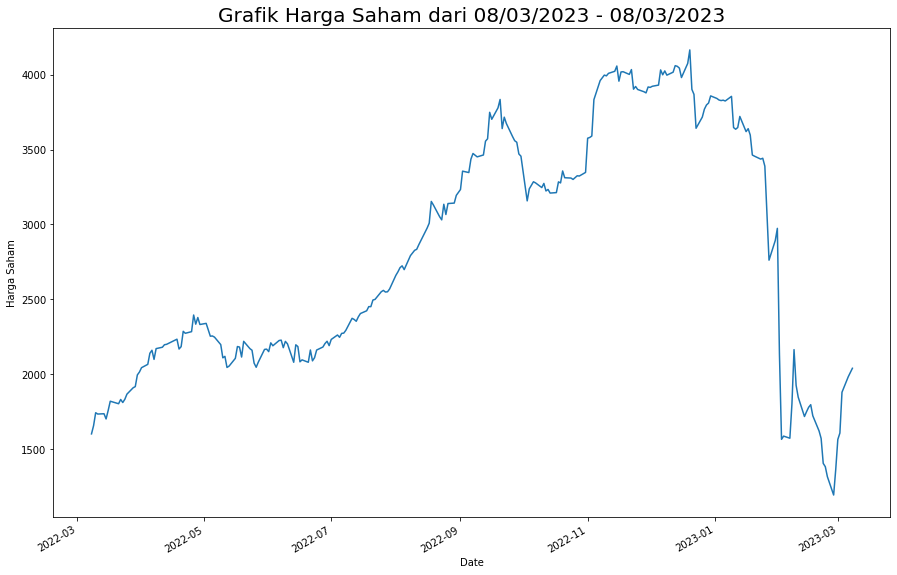

In [ ]:
ADN_DF['close'].plot(figsize= (15, 10))
plt.title('Grafik Harga Saham dari 08/03/2023 - 08/03/2023', fontsize=20)
plt.ylabel('Harga Saham')
plt.savefig('Grafik harga saham.jpg')

Dari grafik terlihat bahwa terjadi kenaikan yang sangat singnifikan pada bulan maret 2022 hingga januari 2023 dan terjadi penurunan yang sangat drastis dari januari 2023 hingga maret 2023

Selanjutnya perhitungan persentase secara per hari

Perhitungan persentase saham harian dihitung berdasarkan harga penutupan per 2 hari berturut-turut. Contohnya jika penutupan hari kemarin bernilai 2039 dan hari ini bernilai 1982 maka (((1981-2039)/2039)*100)).

## Analisis Harga Sahan berdasarkan perhari (Daily Return)

In [ ]:
ADN_DF['Day_percent'] = ADN_DF['close'].pct_change()*100
ADN_DF.head(5)

,Date,OPEN,HIGH,LOW,close,VOLUME,VALUE,No_of_trades,Day_percent
Date,,,,,,,,,
2023-03-08,2023-03-08,2040.00,2088.00,1941.0,2039.65,13568243.0,2.753459e+10,625491,NaN
2023-03-06,2023-03-06,1966.70,2135.00,1855.0,1982.90,27180456.0,5.493284e+10,1230939,-2.782340
2023-03-03,2023-03-03,1688.85,1905.95,1685.5,1879.50,22888891.0,4.135292e+10,822488,-5.214585
2023-03-02,2023-03-02,1499.90,1646.00,1407.9,1607.25,26970925.0,4.219620e+10,924791,-14.485235
2023-03-01,2023-03-01,1424.00,1580.00,1411.0,1564.30,20114340.0,3.040028e+10,758963,-2.672266


karena hari pertama tidak ada hari sebelumnya maka bernilai null sehingga diperlukan penghapusan data

In [ ]:
ADN_DF.dropna(axis = 0, inplace = True)
ADN_DF.head()

,Date,OPEN,HIGH,LOW,close,VOLUME,VALUE,No_of_trades,Day_percent
Date,,,,,,,,,
2023-03-06,2023-03-06,1966.70,2135.00,1855.00,1982.90,27180456.0,5.493284e+10,1230939,-2.782340
2023-03-03,2023-03-03,1688.85,1905.95,1685.50,1879.50,22888891.0,4.135292e+10,822488,-5.214585
2023-03-02,2023-03-02,1499.90,1646.00,1407.90,1607.25,26970925.0,4.219620e+10,924791,-14.485235
2023-03-01,2023-03-01,1424.00,1580.00,1411.00,1564.30,20114340.0,3.040028e+10,758963,-2.672266
2023-02-28,2023-02-28,1145.00,1398.00,1103.75,1363.85,33948366.0,4.437163e+10,1047492,-12.814038


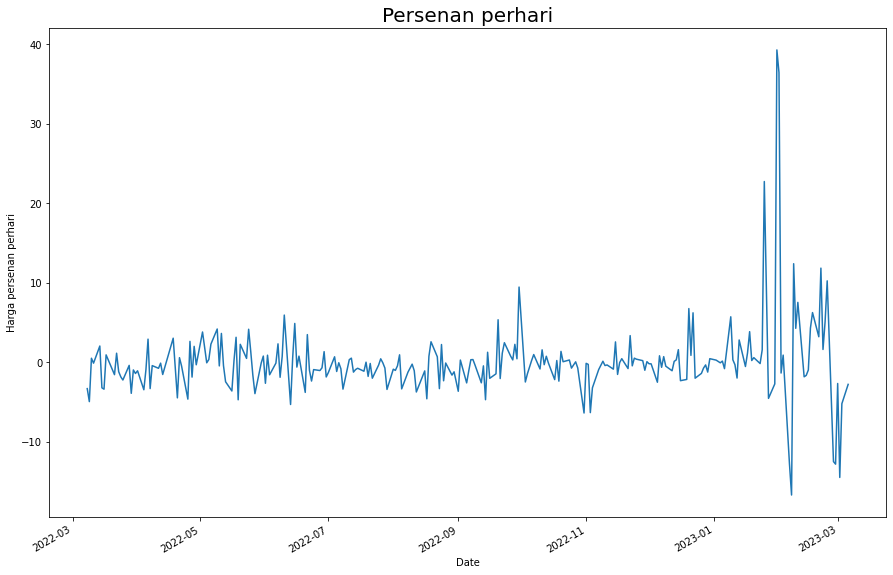

In [ ]:
ADN_DF['Day_percent'].plot(figsize= (15, 10))
plt.ylabel('Harga persenan perhari')
plt.title('Persenan perhari', fontsize=20)
plt.savefig('Grafik Harga Saham per senan per hari.jpg')

Dari grafik dapat diamati bahwa pengembalian harian berada pada range kurang dari -10% hingga 10% dengan beberapa lonjakan melebihi 10% pada kedua sisi. Namun beberapa lonjakan terjadi melebihi 30%.
Dari beberapa sumber mengatakan bahwa perusahaan ini mengalami kerugian yang sangat besar. Namun masih memiliki kejanggalan terkait penyebab hal tersebut dari beberapa sumber yang mungkin tidak dapat saya sebutkan disini. Hal ini dikarenakan analisis ini hanya berfungsi sebagai pembelajaran saya terkait pengolahan data.

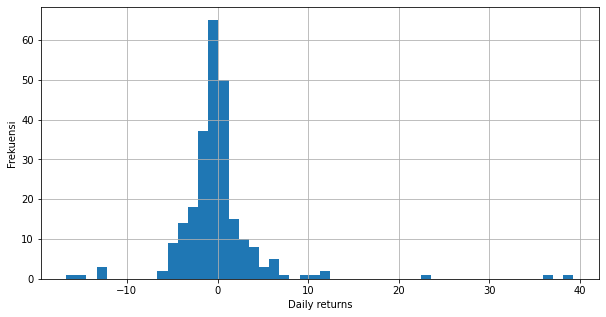

count    249.000000
mean       0.014864
std        4.975723
min      -16.694005
25%       -1.575246
50%       -0.338529
75%        0.752454
max       39.269909
Name: Day_percent, dtype: float64

<Figure size 432x288 with 0 Axes>

In [ ]:
ADN_DF['Day_percent'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frekuensi')
plt.show()
plt.savefig('Histogram Daily return.png')
#satistics
ADN_DF.Day_percent.describe()

Selama setahun pengembalian harian memiliki nilai rata-rata 0.014

TRYING TREND ANALYSIS

In [ ]:
def trend(x):
    if x > -0.5 and x <= 0.5:
      return 'slighht or no change'
    elif x > 0.5 and x <= 1:
      return 'Slight positive'
    elif x > -1 and x <= -0.5:
      return 'slight negatif'
    elif x > 1 and x <= 3:
      return 'positive'
    elif x > -3 and x <= -1:
      return 'Negative'
    elif x > 3 and x <= 7:
      return 'Top Positive'
    elif x > -7 and x <= -3:
      return 'Bottom Negative'
    elif x > 7:
      return 'Bull Run'
    elif x <= 7:
      return 'Bear Drop'

In [ ]:
ADN_DF['Trend_Analysis'] = ADN_DF['Day_percent'].apply(lambda x:trend(x))
ADN_DF.head(5)

,Date,OPEN,HIGH,LOW,close,VOLUME,VALUE,No_of_trades,Day_percent,Trend_Analysis
Date,,,,,,,,,,
2023-03-06,2023-03-06,1966.70,2135.00,1855.00,1982.90,27180456.0,5.493284e+10,1230939,-2.782340,Negative
2023-03-03,2023-03-03,1688.85,1905.95,1685.50,1879.50,22888891.0,4.135292e+10,822488,-5.214585,Bottom Negative
2023-03-02,2023-03-02,1499.90,1646.00,1407.90,1607.25,26970925.0,4.219620e+10,924791,-14.485235,Bear Drop
2023-03-01,2023-03-01,1424.00,1580.00,1411.00,1564.30,20114340.0,3.040028e+10,758963,-2.672266,Negative
2023-02-28,2023-02-28,1145.00,1398.00,1103.75,1363.85,33948366.0,4.437163e+10,1047492,-12.814038,Bear Drop


In [ ]:
ADN_DF.iloc[:,-1]

Date
2023-03-06                Negative
2023-03-03         Bottom Negative
2023-03-02               Bear Drop
2023-03-01                Negative
2023-02-28               Bear Drop
                      ...         
2022-03-14                positive
2022-03-11    slighht or no change
2022-03-10         Slight positive
2022-03-09         Bottom Negative
2022-03-08         Bottom Negative
Name: Trend_Analysis, Length: 249, dtype: object

In [ ]:
ADN_DF['Trend_Analysis'].str.contains('Bottom Negative')

Date
2023-03-06    False
2023-03-03     True
2023-03-02    False
2023-03-01    False
2023-02-28    False
              ...  
2022-03-14    False
2022-03-11    False
2022-03-10    False
2022-03-09     True
2022-03-08     True
Name: Trend_Analysis, Length: 249, dtype: bool

In [ ]:
ADN_DF['Trend_Analysis'].value_counts()

slighht or no change    64
Negative                56
Bottom Negative         27
positive                24
slight negatif          23
Slight positive         22
Top Positive            20
Bull Run                 8
Bear Drop                5
Name: Trend_Analysis, dtype: int64

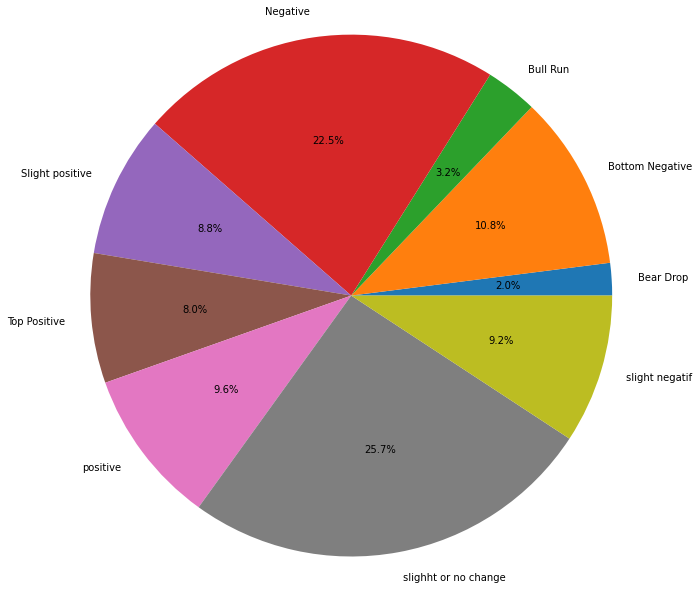

<Figure size 432x288 with 0 Axes>

In [ ]:
ADN_Pie_Data = ADN_DF.groupby('Trend_Analysis')
Pie_Label = sorted([i for i in ADN_DF.loc[:, 'Trend_Analysis'].unique()])
plt.pie(ADN_Pie_Data['Trend_Analysis'].count(), labels= Pie_Label,
        autopct = '%1.1f%%', radius = 3)

plt.show()
plt.savefig('Pie Trend Analysis.jpg')

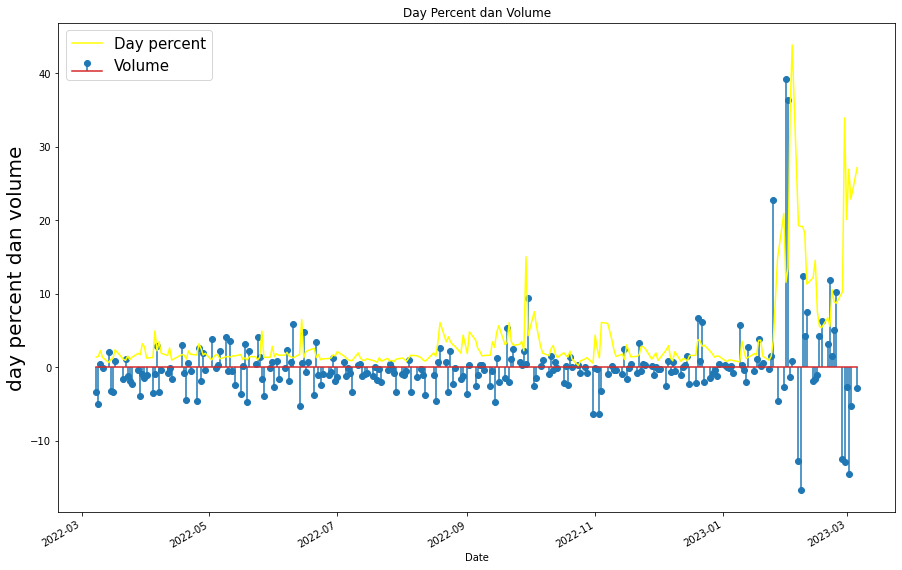

<Figure size 432x288 with 0 Axes>

In [ ]:
plt1 = plt.stem(ADN_DF['Date'], ADN_DF['Day_percent'])
plt2 = (ADN_DF['VOLUME']/1000000).plot(figsize= (15, 10), color='yellow')
plt.title('Day Percent dan Volume')
plt.legend(labels = ('Day percent', 'Volume'), loc = 'upper left', fontsize= 15)
plt.ylabel('day percent dan volume', fontsize= 20)
plt.show()
plt.savefig('Grafik Percent dan Volume.jpg')

In [ ]:
ADN_DF.to_csv('Saham_Adanient_setelah_diolah.csv')